In [1]:
'''
We ingest the data.ods and reformat to
client_id \t path \t sentence_id \t sentence \t locale

Here
client_id is a unique identifier for the song
path is a path to the song
sentence_id is a unique identifier for the sentence
sentence is the Gaelic text
sentence_domain=up_votes=down_votes=age=gender=accents=variant
locale is set to ga-IE

The client_id can be extracted from the filename "song_x,..wav"
The sentence_id can be extracted from the "..., phrase_xx..wav"

The filenames can be coupled to the filenames via the phrase_number, which is in on the data.ods
'''


'\nWe ingest the data.ods and reformat to\nclient_id \t path \t sentence_id \t sentence \t locale\n\nHere\nclient_id is a unique identifier for the song\npath is a path to the song\nsentence_id is a unique identifier for the sentence\nsentence is the Gaelic text\nsentence_domain=up_votes=down_votes=age=gender=accents=variant\nlocale is set to ga-IE\n\nThe client_id can be extracted from the filename "song_x,..wav"\nThe sentence_id can be extracted from the "..., phrase_xx..wav"\n\nThe filenames can be coupled to the filenames via the phrase_number, which is in on the data.ods\n'

In [2]:
%load_ext autoreload
%autoreload 2
import os
import re
import hashlib
import pandas as pd
import numpy as np
from tqdm import tqdm

In [3]:
GET_PHONEMES = False
INCLUDE_SINGERS = [5, 10, 21, 25, 26, 13] #, if None then keep all

In [4]:
os.chdir('/media/bramiozo/DATA-FAST/TTS/tts_models/gle/seannos_datasource')

In [5]:
lyrics_original =  pd.read_excel('dataset_lyrics/lyrics.ods')

In [6]:
lyrics_original.dtypes

phrase_number     int64
singer           object
sentence         object
Title            object
English          object
dtype: object

In [7]:
def get_song_str(fn):
    part_1 = (fn.split(',')[0]).strip()
    part_2 = part_1.split("_")[-2:]
    return "_".join(part_2)

In [8]:
# prep1, prep2, prep3, prep4, prep6, prep7 in combination with the singer should be denoted as unique singers
unique_preps = ['prep1', 'prep2', 'prep3', 'prep4', 'prep6', 'prep7']

In [9]:
filenames = os.listdir('clips')

file_df = pd.DataFrame([{'client_id': hashlib.md5(b""+(f"{get_song_str(s)}").encode("latin1")).hexdigest(),
  'path': s,
  'song': s.split(",")[0].strip().split("_")[-1],
  'phrase_version': s.split("_")[0],
  'phrase_number': int(s.split(',')[1].strip().split("_")[1])
  } for s in filenames])

In [10]:
final_df = lyrics_original[['phrase_number', 'sentence', 'singer']].merge(file_df, how='inner', on='phrase_number')

In [11]:
if isinstance(INCLUDE_SINGERS, list):
    final_df = final_df[final_df.singer.isin(INCLUDE_SINGERS)].reset_index(drop=True)

In [12]:
final_df = final_df.assign(locale='ga-IE')
final_df = final_df.assign(sentence_domain='')
final_df = final_df.assign(up_votes='')
final_df = final_df.assign(down_votes='')
final_df = final_df.assign(age='')
final_df = final_df.assign(gender='')
final_df = final_df.assign(accents='')
final_df = final_df.assign(variant='')

In [13]:
gender_map = {
    '1': 'male',
    '2': 'female',
    '3': 'female',
    '4': 'male',
    '5': 'female',
    '6': 'female', 
    '7': 'male',
    '8': 'male',
    '9': 'male',
    '11': 'female',
    '12': 'female',
    '13': 'female',
    '14': 'female',
    '15': 'male',
    '16': 'male',
    '17': 'female',
    '18': 'male',
    '19': 'male',
    '22': 'female',
    '23': 'female',
    '24': 'female',
    '25': 'female',
    '26': 'female',
    '27': 'female',
    '28': 'female',
    '29': 'female',
    '30': 'male',
    '31': 'female',
    '32': 'female', 
    '33': 'female',
    '34': 'female',
    '35': 'female',
    '36': 'female',
    '37': 'female',
    '38': 'male',
    '39': 'female',   
}

client_map = {
    'fb10b1b655a2b34af288a4ff51460080': 'female',
    'eb6e87c69c6bb1914b33b66e22c43b22': 'female',
    'ce29c518eaf3469a00c1b49df4a6fa58': 'female',
    'b9ce569cc8664a79633c2e49b6951772': 'female',
    'b501dd4c046f528a66c085a29a77fa96': 'female',
    'ad7c36b78f0904b97958275bc316fc4a': 'female',
    'a168b2952fd26fad6352725ad5d32c89': 'male',
    'a05faf2da14346a9eebcb1cef52cdf70': 'male',
    '9d6bf453b18c2401cf42e86fd7084048': 'male',
    '9be4875162b0b52ac5853090d9816d9e': 'female',
    '8a3d80b09d305f7e61710569dacd7b8a': 'male',
    '82072466fe7e953258121bfed776c4c8': 'male',
    '8059835b0296b8f2d8f88ee9d5ff2bc1': 'female',
    '7cc5fa83c13a9bba0058047168213fd3': 'female',
    '7396e94dda5897f01e213ea8895f5f34': 'female',
    '6685ae01c52fccb1b73d803bc0ac65f2': 'female',
    '5d179b5ee524d198cb483c6b6ff22e56': 'female',
    '5641ceb7957ec589f136638189c5fc5d': 'male',
    '53deaae6c3c39e7db142a88fb1859ba8': 'female',
    '5200d298dcdf65f11f9b738a8b0b68dd': 'male',
    '42a114cfae45f0e7562ecee67c7c4b9b': 'female',
    '40b30d9f3e6d06f3d9cc6d118b04fda7': 'male',
    '3f4d025bf63ba0bd11873d448217c394': 'female',
    '3c514de0167d3e12cda5f1221269ccfa': 'male',
    '3b1b99b2d042b9228b9b6ed7ba6ef0cf': 'female',
    '2d6587eaf934b300a40091b3df85ce66': 'female',
    '2bfd305a6c139c602fcf11065c368d67': 'male',
    '23f2d50b628d98ecd1458b53ebd1e0c4': 'male',
    '24b00678a1add71b1a69837a0e2478c1': 'female',
    '5599a98ac42fb2d3b2618ca52d4ee48c': 'female',
    'e687cfb58aa0a2abf7dc596503cfcf68': 'female',
    '666ac977145186527ee2ee11e0b8335e': 'female',
    '40291794d294568b8e881d84b63b4d4a': 'female',
    '717a92c1cd9b05391b5e20b6ddb6e98e': 'female',
    '03c0170448334d0b0cfab68ee3690b7c': 'male',
    'e30aaf33d6b93dc7b766641a2a03efc1': 'female'
}

good_singers = {
    1: '24b00678a1add71b1a69837a0e2478c1',
    2: 'e30aaf33d6b93dc7b766641a2a03efc1',
    3: 'fb10b1b655a2b34af288a4ff51460080',
    4: 'b9ce569cc8664a79633c2e49b6951772', 
    5: '7396e94dda5897f01e213ea8895f5f34',
    6: 'ce29c518eaf3469a00c1b49df4a6fa58'
}



In [14]:
final_df = final_df.assign(gender=final_df.song.map(gender_map))
#final_df = final_df.assign(client_id=final_df.client_id.map(client_map))

In [16]:
final_df = final_df.assign(singer=final_df[['singer', 'phrase_version']].apply(lambda x: str(x['singer'])+"_"+x['phrase_version'] if x['phrase_version'] in unique_preps else str(x['singer']), axis=1))

In [18]:
# replace client_id by singer 
final_df = final_df.assign(singer_id=final_df.singer.apply(lambda x: hashlib.md5(b""+str(x).encode("latin1")).hexdigest()))

In [19]:
final_df.loc[final_df.client_id.isin(good_singers.values()), 'singer_id'].unique() 

array(['e4da3b7fbbce2345d7772b0674a318d5',
       '80a18697034df465b1389c83a162671e',
       'fbb1a0cf39f11efcc031d950dabb052e',
       '4f3f568df915f015a687e805eb9df1ad',
       '0528c8bed09c276fb6ab058820dbf9e0',
       '8e4521f661be9f290754b628b13287cd',
       'b6dae536607dde3f4bd703e4ce4503a9',
       'b17c83db240d11a6fad46d0ae192919c',
       '348205306660c48601127bb527ae6236',
       '0e0de9a39de96770d50e6fedbcaf0f69',
       'cf578dcbc64593a2fe63fc4fc5cddb24',
       'd3d9446802a44259755d38e6d163e820',
       '07974b511961d09cb0da27c0c959ab8d',
       '51ea13b61ee913ae2b476d4f3f097641',
       '8035d82adb0d3c555a7385dd71334b89',
       '48f201c41da12785c261609464a62844',
       'c51ce410c124a10e0db5e4b97fc2af39',
       'cd05f37a6461cac7c1bcb5821eeba956',
       '381e184749c2bc3f6a695c37268cbf81',
       '6eddcfa61c78714480dd473a20b70af5',
       'e83d77f90f9ba19d248c1bade97829fe',
       '8895fb4495a5bca3662764c443b88ef9',
       '68a4cdad6eb440a9c9e3668966f6e48e',
       '3c5

In [20]:
final_df.loc[final_df.client_id.isin(good_singers.values()), 'singer'].unique()

array(['5', '5_prep7', '5_prep1', '5_prep4', '5_prep3', '5_prep6',
       '5_prep2', '10_prep3', '10_prep7', '10_prep2', '10_prep1', '10',
       '10_prep4', '10_prep6', '13_prep6', '13_prep4', '13', '13_prep2',
       '13_prep3', '13_prep7', '13_prep1', '21_prep7', '21_prep2', '21',
       '21_prep3', '21_prep1', '21_prep6', '21_prep4', '25', '25_prep3',
       '25_prep4', '25_prep7', '25_prep1', '25_prep6', '25_prep2', '26',
       '26_prep3', '26_prep7', '26_prep6', '26_prep4', '26_prep2',
       '26_prep1'], dtype=object)

In [21]:
final_df.client_id.nunique(), final_df.singer_id.nunique(),

(19, 42)

In [22]:
final_df.client_id = final_df.singer_id

In [23]:
final_df = final_df.dropna(subset=['sentence'], axis=0)

In [24]:
final_df = final_df.assign(sentence_id = final_df.sentence.apply(lambda s: hashlib.md5(s.encode("utf-8")).hexdigest() ))

In [25]:
final_df.sentence = final_df.sentence.str.replace('*','', regex=False)
final_df.sentence = final_df.sentence.str.replace('-',', ', regex=False)
final_df.sentence = final_df.sentence.str.replace('–',', ', regex=False)
final_df.sentence = final_df.sentence.str.replace('`',"'", regex=False)
final_df.sentence = final_df.sentence.str.replace('’',"'", regex=False)
final_df.sentence = final_df.sentence.str.replace('‘',"'", regex=False)

In [26]:
final_df = final_df.drop('singer', axis=1)

In [27]:
import unicodedata
from TTS.tts.utils.text.phonemizers import ESpeak

if GET_PHONEMES:
    phoneme_mapping = {
        # Map dental stops to alveolar stops
        't̪': 't',
        'd̪': 'd',
        # Map nasal variations to 'n'
        'n̠': 'n',
        # Map lateral variations
        'l̠': 'l',
        # Add other mappings as needed
    }
    
    def clean_phonemes(phonemes):
        # Remove stress markers and punctuation
        phonemes = phonemes.replace('ˈ', '').replace('ˌ', '')
        phonemes = phonemes.replace('.', '').replace('|', '')
        phonemes = phonemes.replace('?', '').replace('!', '').replace(',', '').replace(';', '')
        # Normalize Unicode to decompose characters
        phonemes = unicodedata.normalize('NFD', phonemes)
        # Remove diacritic marks (characters with combining class 'Mn')
        phonemes = ''.join([c for c in phonemes if unicodedata.category(c) != 'Mn'])
        # Split phonemes and apply mapping
        phoneme_list = phonemes.strip().split(' ')
        mapped_phonemes = [phoneme_mapping.get(p, p) for p in phoneme_list]
        # Remove empty strings
        mapped_phonemes = [p for p in mapped_phonemes if p]
        # Rejoin phonemes
        phonemes = ' '.join(mapped_phonemes)
        return phonemes
    
    
    
    phonemizer = ESpeak(language='ga')
    phoneme_set = set()
    
    # Replace this with the path to your dataset's text file
    
    sentence_list = final_df.sentence.unique()
    for line in tqdm(sentence_list):
        text = line.strip()
        phonemes = phonemizer.phonemize(text, separator=" ")
        phonemes = clean_phonemes(phonemes)
        phoneme_set.update(phonemes.split())
        
    # Save the phoneme list
    phoneme_list = sorted(phoneme_set)
    print(len(phoneme_list))
    print(" ".join(phoneme_list))

In [28]:
columns = ['client_id', 'path', 'sentence', 'sentence_id', 'sentence_domain', 'up_votes', 'down_votes', 'age', 'gender', 'accents', 'variant', 'locale']

# from client_id select 2 sentences for validation and remove from final_df
test_df = final_df.groupby('client_id').apply(lambda x: x.sample(n=2, replace=False)).drop('client_id', axis=1).reset_index()
rm_indcs = test_df.level_1
test_df = test_df.drop('level_1', axis=1)

In [29]:
final_df

,phrase_number,sentence,client_id,path,song,phrase_version,locale,sentence_domain,up_votes,down_votes,age,gender,accents,variant,singer_id,sentence_id
0,77,"Ó, éireod ar maidin in ainm an Domhnaigh,",e4da3b7fbbce2345d7772b0674a318d5,"resampled_noise_song_5, phrase_77,time_00-3.wav",5,resampled,ga-IE,,,,,female,,,e4da3b7fbbce2345d7772b0674a318d5,0182e4433830396aafa361c7f9946879
1,77,"Ó, éireod ar maidin in ainm an Domhnaigh,",80a18697034df465b1389c83a162671e,"prep7_song_5, phrase_77,time_00-3.wav",5,prep7,ga-IE,,,,,female,,,80a18697034df465b1389c83a162671e,0182e4433830396aafa361c7f9946879
2,77,"Ó, éireod ar maidin in ainm an Domhnaigh,",e4da3b7fbbce2345d7772b0674a318d5,"prep5_song_5, phrase_77,time_00-3.wav",5,prep5,ga-IE,,,,,female,,,e4da3b7fbbce2345d7772b0674a318d5,0182e4433830396aafa361c7f9946879
3,77,"Ó, éireod ar maidin in ainm an Domhnaigh,",fbb1a0cf39f11efcc031d950dabb052e,"prep1_song_5, phrase_77,time_00-3.wav",5,prep1,ga-IE,,,,,female,,,fbb1a0cf39f11efcc031d950dabb052e,0182e4433830396aafa361c7f9946879
4,77,"Ó, éireod ar maidin in ainm an Domhnaigh,",4f3f568df915f015a687e805eb9df1ad,"prep4_song_5, phrase_77,time_00-3.wav",5,prep4,ga-IE,,,,,female,,,4f3f568df915f015a687e805eb9df1ad,0182e4433830396aafa361c7f9946879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3250,1153,'S an téiril éiril eaidí,c51ce410c124a10e0db5e4b97fc2af39,"noised_song_47,phrase_1153,time_435-438.wav",47,noised,ga-IE,,,,,NaN,,,c51ce410c124a10e0db5e4b97fc2af39,cf92568f2948815c1e1e74fe00e874eb
3251,1153,'S an téiril éiril eaidí,c51ce410c124a10e0db5e4b97fc2af39,"song_47,phrase_1153,time_435-438.wav",47,song,ga-IE,,,,,NaN,,,c51ce410c124a10e0db5e4b97fc2af39,cf92568f2948815c1e1e74fe00e874eb
3252,1154,Téiril éiril é Seán a' bhríste leathair.,c51ce410c124a10e0db5e4b97fc2af39,"song_47,phrase_1154,time_438-444.wav",47,song,ga-IE,,,,,NaN,,,c51ce410c124a10e0db5e4b97fc2af39,450532db90098751fb0bccabe174cb4b
3253,1154,Téiril éiril é Seán a' bhríste leathair.,c51ce410c124a10e0db5e4b97fc2af39,"noised_song_47,phrase_1154,time_438-444.wav",47,noised,ga-IE,,,,,NaN,,,c51ce410c124a10e0db5e4b97fc2af39,450532db90098751fb0bccabe174cb4b


In [30]:
mask = np.ones(len(final_df), dtype=bool)
mask[rm_indcs] = False
train_df = final_df.iloc[mask]

In [31]:
import wave
def get_wav_duration(filepath):
    with wave.open(filepath, 'rb') as wav_file:
        frames = wav_file.getnframes()
        rate = wav_file.getframerate()
        duration = frames / float(rate)
        return int(duration * 1000)  

from pydub import AudioSegment
def get_wav_durationV2(filepath):
    audio = AudioSegment.from_wav(filepath)
    duration_ms = len(audio)
    return duration_ms

In [32]:
duration_df = []
for f in filenames:
    fn = os.path.join('clips', f)
    duration = get_wav_durationV2(fn)
    duration_df.append({'clip': f,  'duration[ms': duration})
    
pd.DataFrame(duration_df).to_csv('clip_durations.tsv', sep='\t', index=False)

In [33]:
dur_df = pd.DataFrame(duration_df)

<Axes: >

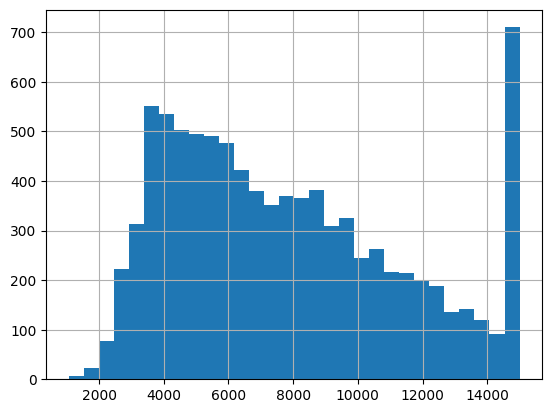

In [44]:
dur_df['duration[ms'].clip(0,15_000).hist(bins=30)

In [34]:
dur_df[dur_df['duration[ms']>15_000]['clip'].str.split(",").apply(lambda x: x[1]).nunique()

109

In [35]:
keep_phrases = dur_df[dur_df['duration[ms']<15_000]['clip'].values

In [36]:
keep_phrases.shape

(8518,)

In [37]:
train_df = train_df.loc[train_df.path.isin(keep_phrases)]
test_df = test_df.loc[test_df.path.isin(keep_phrases)]


In [38]:
test_df[columns].to_csv('test.tsv', sep='\t', index=False)
train_df[columns].to_csv('train.tsv', sep='\t', index=False)

In [39]:
dur_df[dur_df['duration[ms']>15_000]['clip'].str.split(",").apply(lambda x: x[1])

29      phrase_747
76      phrase_967
90      phrase_734
91      phrase_424
119     phrase_645
           ...    
8976     phrase_56
8995    phrase_667
9057     phrase_97
9082    phrase_650
9109    phrase_669
Name: clip, Length: 607, dtype: object

In [48]:
train_df

,phrase_number,sentence,client_id,path,song,phrase_version,locale,sentence_domain,up_votes,down_votes,age,gender,accents,variant,singer_id,sentence_id
0,77,"Ó, éireod ar maidin in ainm an Domhnaigh,",e4da3b7fbbce2345d7772b0674a318d5,"resampled_noise_song_5, phrase_77,time_00-3.wav",5,resampled,ga-IE,,,,,female,,,e4da3b7fbbce2345d7772b0674a318d5,0182e4433830396aafa361c7f9946879
1,77,"Ó, éireod ar maidin in ainm an Domhnaigh,",80a18697034df465b1389c83a162671e,"prep7_song_5, phrase_77,time_00-3.wav",5,prep7,ga-IE,,,,,female,,,80a18697034df465b1389c83a162671e,0182e4433830396aafa361c7f9946879
3,77,"Ó, éireod ar maidin in ainm an Domhnaigh,",fbb1a0cf39f11efcc031d950dabb052e,"prep1_song_5, phrase_77,time_00-3.wav",5,prep1,ga-IE,,,,,female,,,fbb1a0cf39f11efcc031d950dabb052e,0182e4433830396aafa361c7f9946879
4,77,"Ó, éireod ar maidin in ainm an Domhnaigh,",4f3f568df915f015a687e805eb9df1ad,"prep4_song_5, phrase_77,time_00-3.wav",5,prep4,ga-IE,,,,,female,,,4f3f568df915f015a687e805eb9df1ad,0182e4433830396aafa361c7f9946879
5,77,"Ó, éireod ar maidin in ainm an Domhnaigh,",0528c8bed09c276fb6ab058820dbf9e0,"prep3_song_5, phrase_77,time_00-3.wav",5,prep3,ga-IE,,,,,female,,,0528c8bed09c276fb6ab058820dbf9e0,0182e4433830396aafa361c7f9946879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3250,1153,'S an téiril éiril eaidí,c51ce410c124a10e0db5e4b97fc2af39,"noised_song_47,phrase_1153,time_435-438.wav",47,noised,ga-IE,,,,,NaN,,,c51ce410c124a10e0db5e4b97fc2af39,cf92568f2948815c1e1e74fe00e874eb
3251,1153,'S an téiril éiril eaidí,c51ce410c124a10e0db5e4b97fc2af39,"song_47,phrase_1153,time_435-438.wav",47,song,ga-IE,,,,,NaN,,,c51ce410c124a10e0db5e4b97fc2af39,cf92568f2948815c1e1e74fe00e874eb
3252,1154,Téiril éiril é Seán a' bhríste leathair.,c51ce410c124a10e0db5e4b97fc2af39,"song_47,phrase_1154,time_438-444.wav",47,song,ga-IE,,,,,NaN,,,c51ce410c124a10e0db5e4b97fc2af39,450532db90098751fb0bccabe174cb4b
3253,1154,Téiril éiril é Seán a' bhríste leathair.,c51ce410c124a10e0db5e4b97fc2af39,"noised_song_47,phrase_1154,time_438-444.wav",47,noised,ga-IE,,,,,NaN,,,c51ce410c124a10e0db5e4b97fc2af39,450532db90098751fb0bccabe174cb4b
